# **Analisi preliminare dei dati**

###**Lettura dei dati da file**

In [2]:
import pandas as pd                      # Importazione libreria Pandas
import warnings
warnings.filterwarnings("ignore")        # Blocco della stampa di avvisi

df = pd.read_csv('dataset_027.csv')      # Legge il file e lo assegna alla variabile df
colonne = list(df.columns)               # Memorizza tutte le key del dataset nella variabile colonne
features = colonne[:-1]                  # Assegna alle features tutte le key da data_0 a data_5 escluso label

print('Tabella dei dati \n')
display(df)                              # Stampa della tabella dei dati
print()

print('\nTabella delle statistiche \n')
display(df.describe())                   # Stampa della tabella descrittiva
print()

Tabella dei dati 



,data_0,data_1,data_2,data_3,data_4,data_5,label
0,-8.665669,83.292238,-826.425208,8.676801,0.124398,0.433063,1.577633
1,-6.964593,75.787943,-848.456847,9.401223,0.121808,0.348659,0.104908
2,-7.853398,84.410167,-987.150747,9.337333,0.117807,0.327580,0.870400
3,-7.669739,76.517782,-821.473266,9.807937,0.106792,0.445399,1.029126
4,-8.348718,84.574506,-886.324177,7.623974,0.112191,0.387652,1.141144
...,...,...,...,...,...,...,...
495,-7.180034,78.370073,-740.440972,9.496644,0.120532,0.282425,-0.552447
496,-7.888177,83.574484,-766.570383,9.491325,0.115046,0.409138,-0.108013
497,-6.978101,90.018206,-975.820265,7.829954,0.126183,0.311058,-1.636636
498,-8.207062,84.346128,-884.520948,9.761344,0.124664,0.353315,0.930858




Tabella delle statistiche 



,data_0,data_1,data_2,data_3,data_4,data_5,label
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-7.517735,82.639129,-901.896706,9.319034,0.118503,0.389382,-0.134209
std,1.019980,10.028907,101.526778,0.709363,0.009560,0.093246,1.778988
min,-15.493350,6.520742,-1744.114073,7.556644,0.100829,0.194514,-5.357358
25%,-7.964999,78.217200,-943.974841,8.828615,0.113025,0.339462,-1.260301
50%,-7.453604,83.290992,-897.569180,9.288508,0.118036,0.379543,-0.127316
75%,-6.954417,88.140269,-845.819960,9.786059,0.122713,0.430309,0.993542
max,-5.223265,103.600293,-648.045341,11.649392,0.193566,1.057886,5.051513


Come si può notare dalla tabella dei dati, le labels sono di tipo continuo: è necessario un algoritmo di regressione.



### **Standardizzazione dei dati**



In [3]:
from sklearn.preprocessing import StandardScaler   # Importazione libreria per standardizzazione

ss = StandardScaler()                              # Standard Scaler per la standardizzazione
df[features]=ss.fit_transform(df[features])        # Si standardizzano tutte le features nel dataset

print('\nTabella delle statistiche del dataset standardizzato \n')
display(df.describe())                   # Stampa della tabella descrittiva
print()


Tabella delle statistiche del dataset standardizzato 



,data_0,data_1,data_2,data_3,data_4,data_5,label
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,-4.973799e-16,-1.161737e-15,1.385558e-16,-9.841017e-16,-1.030287e-15,-8.739676e-16,-0.134209
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.778988
min,-7.827214e+00,-7.597500e+00,-8.303827e+00,-2.486955e+00,-1.850499e+00,-2.091908e+00,-5.357358
25%,-4.389413e-01,-4.413599e-01,-4.148686e-01,-6.920433e-01,-5.735052e-01,-5.358905e-01,-1.260301
50%,6.293819e-02,6.506351e-02,4.266716e-02,-4.307631e-02,-4.889082e-02,-1.056173e-01,-0.127316
75%,5.528370e-01,5.490776e-01,5.528877e-01,6.590322e-01,4.408393e-01,4.393528e-01,0.993542
max,2.251777e+00,2.092168e+00,2.502843e+00,3.288430e+00,7.859280e+00,7.176394e+00,5.051513


### **Matrice di correlazione**

In [4]:
# Per determinare se ci sono features non informative o scorrelate si esegue anche la matrice di correlazione.
display(df[features].corr())             # Stampa della tabella di correlazione

,data_0,data_1,data_2,data_3,data_4,data_5
data_0,1.000000,0.538644,0.491968,0.016614,-0.481937,-0.502967
data_1,0.538644,1.000000,0.495036,-0.084311,-0.496578,-0.466484
data_2,0.491968,0.495036,1.000000,-0.098553,-0.499869,-0.500186
data_3,0.016614,-0.084311,-0.098553,1.000000,0.083027,0.016664
data_4,-0.481937,-0.496578,-0.499869,0.083027,1.000000,0.463472
data_5,-0.502967,-0.466484,-0.500186,0.016664,0.463472,1.000000



# **Studio delle features**


### **Istogrammi delle features**

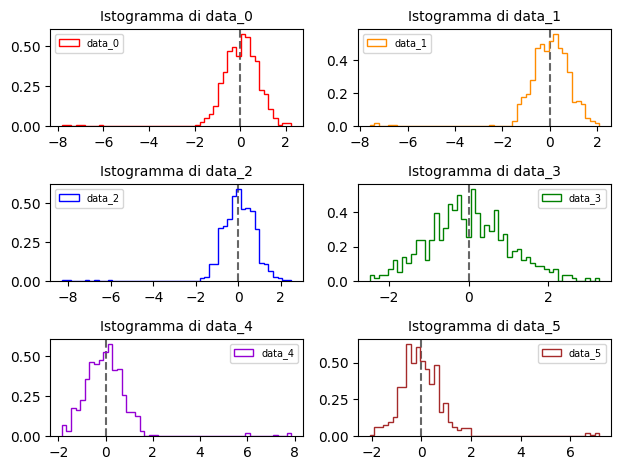

In [5]:
import matplotlib.pyplot as plt            # Importazione libreria matplotlib

colors= ['red','darkorange','blue','green','darkviolet','brown']

def ZeroLine_Plot():                       # Plot linea verticale per valore medio nullo
      plt.axvline(0, linestyle='--',color='black',alpha=0.6)

# Istogrammi delle features standardizzate
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title(f'Istogramma di data_{i}',fontsize=10)
    ZeroLine_Plot()
    plt.hist(df[features[i]], bins=50, histtype='step',color=colors[i], density=True, label=f'data_{i}')
    plt.legend(fontsize=7, loc='best')
plt.tight_layout()

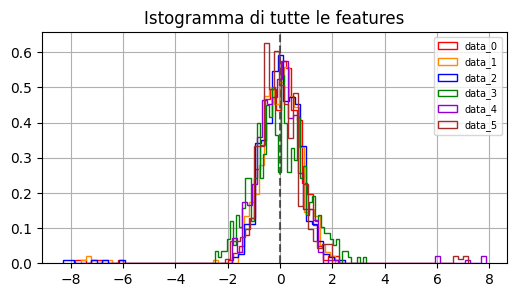

In [6]:
# Istogramma di tutte le features
plt.figure(figsize=(6, 3))
plt.title(f'Istogramma di tutte le features')
ZeroLine_Plot()
for i in range(6):
    plt.hist(df[features[i]], bins=50, histtype='step',color=colors[i], density=True, label=f'data_{i}')
plt.legend(fontsize=7, loc='best')
plt.grid()

### **Scatter Plot**

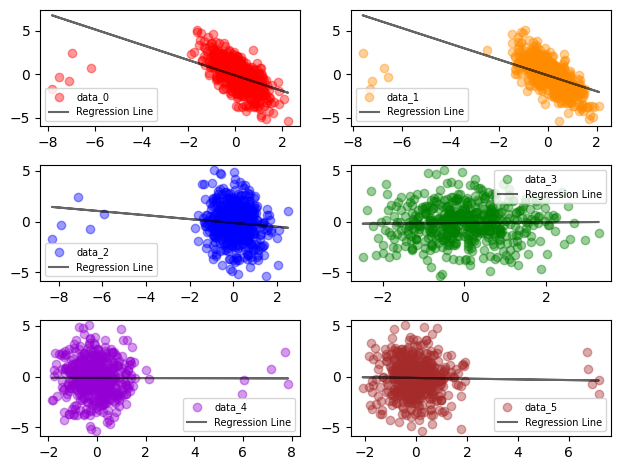

In [7]:
import numpy as np                         # Importazione libreria numpy

# Si hanno 6 features (data_0, data_1, data_2, data_3, data_4, data_5)
# E una label continua (label)

# Plot degli scatterplot con linee di regressione per ciascuna feature

def RegressionLine_Plot(x,y): # Funzione per effettuare e graficare una regressione lineare
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='black', alpha = 0.6, label='Regression Line')

# Scatter Plot

for i in range(6):
  plt.subplot(3,2,i+1)
  plt.scatter(df[features[i]], df['label'], alpha=0.4,label=f'data_{i}',color=colors[i])
  RegressionLine_Plot(df[features[i]], df['label'])
  plt.legend(fontsize=7,loc='best',frameon=True)

plt.tight_layout()

### **Rimozione outliers**

In [8]:
# Media e deviazione standard del dataset
means = df[features].mean(axis=0)
stds = df[features].std(axis=0)

# Soglia per considerare un punto outlier
n_std = 2  # I punti oltre n_std dev. standard vengono rimossi dal dataset

# Indici dei punti outlier per ciascuna feature
# (vengono riconosciuti gli indici delle features che si trovano a più di n_std deviazioni standard)
outliers_i = np.where(np.abs((df[features] - means) / stds) > n_std)
outliers_indices = np.unique(np.concatenate(outliers_i))

# Rimozione dei punti outlier
df_cleaned = df.drop(outliers_indices)
df_cleaned = df_cleaned.reset_index(drop=True)          # Si reindicizza il dataset dopo la rimozione degli outliers
display(df_cleaned[features])

,data_0,data_1,data_2,data_3,data_4,data_5
0,-0.737440,-0.786138,0.919914,-0.737117,-1.736238,-0.123213
1,0.251568,-0.514676,-0.087726,0.067804,-1.106688,-0.809643
2,1.323052,-0.798318,-0.195497,0.314500,-0.201154,-0.098297
3,0.906552,-1.237606,-1.037866,0.659974,-1.686736,0.611085
4,0.840603,-0.150863,-0.005826,1.515594,-0.049876,-0.456786
...,...,...,...,...,...,...
454,0.373446,-0.016078,-1.171111,-0.838498,0.263342,-0.619021
455,0.331417,-0.426101,1.591870,0.250630,0.212505,-1.148184
456,-0.363549,0.093359,1.334248,0.243125,-0.361937,0.212079
457,-0.676500,0.170378,0.171316,0.624155,0.645106,-0.387179


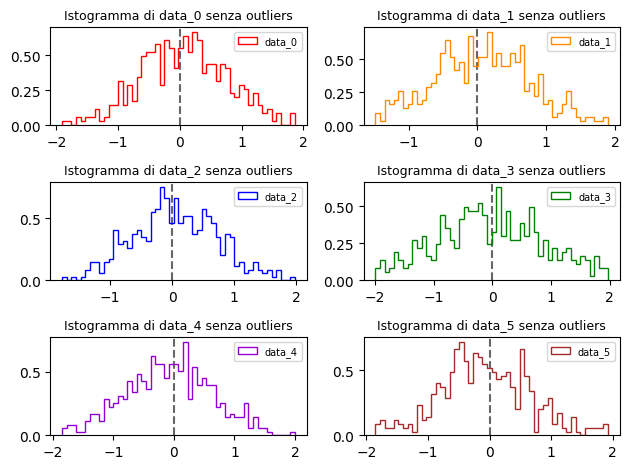

In [9]:
# Istogrammi delle features standardizzate e senza outliers
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title(f'Istogramma di data_{i} senza outliers',fontsize=9)
    ZeroLine_Plot()
    plt.hist(df_cleaned[features[i]], bins=50, histtype='step',color=colors[i], density=True, label=f'data_{i}')
    plt.legend(fontsize=7, loc='best')
plt.tight_layout()

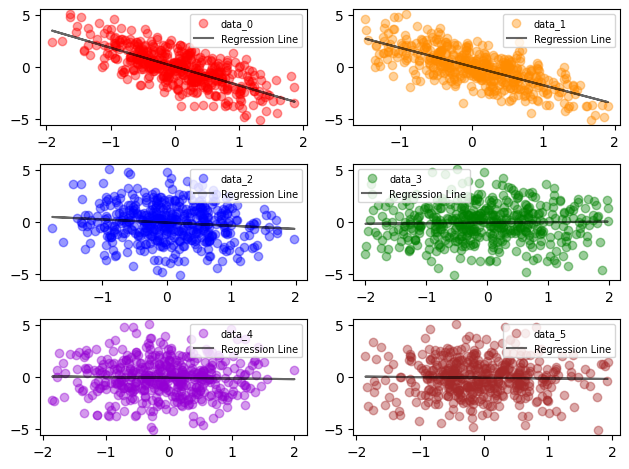

In [10]:
# Scatter plot dei dati ridotti
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.scatter(df_cleaned[features[i]], df_cleaned['label'], alpha=0.4,label=f'data_{i}',color=colors[i])
  RegressionLine_Plot(df_cleaned[features[i]], df_cleaned['label'])
  plt.legend(fontsize=7,loc='best',frameon=True)
plt.tight_layout()

# **Modelli di regressione**


##### **Creazione di test e training set**

In [11]:
from sklearn.metrics import mean_absolute_error       # Importazione libreria per errore medio assoluto
from sklearn.metrics import mean_squared_error        # Importazione libreria per errore medio quadratico

In [12]:
from sklearn.model_selection import train_test_split  # Importazione libreria per separazione train/test

X = df_cleaned[features].drop(['data_3'],axis=1)      # Creazione copia dataset per analisi dati (features senza data_3)
y = df_cleaned['label']                               # Creazione copia dataset per analisi dati (labels)

# Split train/test ---> 80%/20%
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [13]:
# Funzione per la stampa dei risultati dei metodi di regressione
def printResults(R2train,R2test,mse_train,mse_test,mae_train,mae_test,ytest,pred):
  print('Coeff. di determinazione R^2 score:\n Train',R2train,'\n Test:', R2test,'\n')  # Stampa dei coeff. R2
  print("MSE train:", mse_train, "\t MSE test:", mse_test)                              # Stampa degli errori medi quadratici per train e test set
  print("MAE train:", mae_train, "\t MAE test:", mae_test,'\n')                         # Stampa degli errori medi assoluti per train e test set
  print("Media delle label del test set del dataset: ",np.mean(ytest))
  print("Media delle predizioni sul test: ",np.mean(pred))

## **Modelli lineari**

### **LASSO**

Valore ottimale del parametro alpha : 0.0008653323444856528


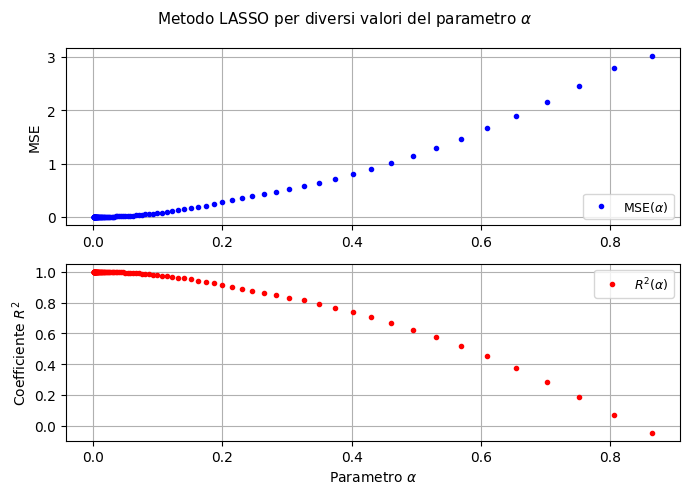

In [14]:
from sklearn.linear_model import Lasso                        # Importazione libreria per LASSO
from sklearn.linear_model import LassoCV                      # Importazione libreria per Cross-Validation per la ricerca dei parametri di LASSO

# Si implementa il modello LassoCV che effettua una Cross-Validation in maniera tale da ottenere il miglior parametro alpha

model1_cv = LassoCV(cv=5, random_state=42)                    # Inizializzazione del modello per la Cross-Validation, cv è il numero di fold considerati

model1_cv.fit(X_train, y_train)                               # Addestramento del modello LASSO con cross-validation

mse1_mean = np.mean(model1_cv.mse_path_, axis=1)              # Errore quadratico medio per ciascun valore di alpha

alpha_best = model1_cv.alpha_                                 # Viene assegnata una variabile al miglior parametro

print("Valore ottimale del parametro alpha :", alpha_best)

regression_test1_cv = np.zeros((model1_cv.alphas_).size)      # Creazione array vuoto degli R2
for i in range((model1_cv.alphas_).size):                     # Ciclo per i valori di alpha
    model1 = Lasso(alpha=model1_cv.alphas_[i])                # Si inizializza LASSO per l'i-esimo il valore di alpha
    model1.fit(X_train, y_train)                              # Si adatta il modello ai dati di training
    regression_test1_cv[i]=model1.score(X_test,y_test)        # Si calcola l'i-esima score R2

plt.figure(figsize=(7, 5))
plt.suptitle('Metodo LASSO per diversi valori del parametro $\\alpha$', fontsize=11)

plt.subplot(2,1,1)
plt.plot(model1_cv.alphas_, mse1_mean,'.b',label="MSE($\\alpha$)")
plt.ylabel('MSE')
plt.grid()
plt.legend(loc='lower right', fontsize=9)

plt.subplot(2,1,2)
plt.plot(model1_cv.alphas_, regression_test1_cv,'.r',label="$R^2(\\alpha)$")
plt.ylabel('Coefficiente $R^2$')
plt.xlabel('Parametro $\\alpha$')
plt.grid()
plt.legend(loc='upper right', fontsize=9)

plt.tight_layout()

Nella seguente cella si inizializza il modello Lasso per il valore di $\alpha$ ottimizzato

In [15]:
model1_best = Lasso(alpha=alpha_best)                         # Inizializzazione del modello

model1_best.fit(X_train, y_train)                             # Si adatta il modello ai dati di training

y_pred1_train = model1_best.predict(X_train)                  # Si valuta il modello sui dati di train effettuando una predizione
y_pred1_test = model1_best.predict(X_test)                    # Si valuta il modello sui dati di test effettuando una predizione

mse1_train = mean_squared_error(y_train, y_pred1_train)       # Calcolo del MSE sui dati di train
mae1_train = mean_absolute_error(y_train, y_pred1_train)      # Calcolo del MAE sui dati di train

mse1_test = mean_squared_error(y_test, y_pred1_test)          # Calcolo del MSE sui dati di test
mae1_test = mean_absolute_error(y_test, y_pred1_test)         # Calcolo del MAE sui dati di test

regressor_train1=model1_best.score(X_train,y_train)           # Calcolo del R^2 Score per i dati di train
regressor_test1=model1_best.score(X_test,y_test)              # Calcolo del R^2 Score per i dati di test

print("Analisi per alpha =",alpha_best,'\n')
printResults(regressor_train1,regressor_test1,mse1_train,mse1_test,mae1_train,mae1_test,y_test,y_pred1_test)

Analisi per alpha = 0.0008653323444856528 

Coeff. di determinazione R^2 score:
 Train 0.9999983522850818 
 Test: 0.9999983762755597 

MSE train: 5.0042827533755804e-06 	 MSE test: 4.966349856773682e-06
MAE train: 0.0017687279896717557 	 MAE test: 0.001787682554578819 

Media delle label del test set del dataset:  -0.3930755440850496
Media delle predizioni sul test:  -0.39274426717236394


###**Linear Regression**


In [16]:
from sklearn.linear_model import LinearRegression             # Importazione libreria per LASSO

model2 = LinearRegression()                                   # Inizializzazione del modello

model2.fit(X_train, y_train)                                  # Si adatta il modello ai dati di training

y_pred2_train = model2.predict(X_train)                       # Si valuta il modello sui dati di train effettuando una predizione
y_pred2_test = model2.predict(X_test)                         # Si valuta il modello sui dati di test effettuando una predizione

mse2_train = mean_squared_error(y_train, y_pred2_train)       # Calcolo del MSE sui dati di train
mae2_train = mean_absolute_error(y_train, y_pred2_train)      # Calcolo del MAE sui dati di train

mse2_test = mean_squared_error(y_test, y_pred2_test)          # Calcolo del MSE sul test set
mae2_test = mean_absolute_error(y_test, y_pred2_test)         # Calcolo del MAE sul test set

regressor_train2=model2.score(X_train,y_train)                # Calcolo del R^2 Score per i dati di train
regressor_test2=model2.score(X_test,y_test)                   # Calcolo del R^2 Score per i dati di test

printResults(regressor_train2,regressor_test2,mse2_train,mse2_test,mae2_train,mae2_test,y_test,y_pred2_test)

Coeff. di determinazione R^2 score:
 Train 1.0 
 Test: 1.0 

MSE train: 5.1308177762239594e-30 	 MSE test: 4.930259763659271e-30
MAE train: 1.7678084813449261e-15 	 MAE test: 1.8206299994175715e-15 

Media delle label del test set del dataset:  -0.3930755440850496
Media delle predizioni sul test:  -0.3930755440850497




## **Modelli non lineari**

### **Random Forest Regressor**

Il **Random Forest Regressor** è una tecnica di apprendimento automatico versatile e potente. Il processo di
creazione di un modello di regressione Random Forest coinvolge la creazione di numerosi alberi decisionali,
ognuno dei quali è addestrato su un sottoinsieme dei dati di addestramento. Questa tecnica di "foresta" e
"casualità" aiuta a mitigare il problema dell’overfitting e a migliorare la generalizzazione del modello.
Quando si effettua una previsione con un modello di regressione Random Forest, ogni albero della foresta genera
una previsione, e la previsione finale è la media delle previsioni generate da ciascun albero. Il seguente
metodo fornisce una stima robusta e resiliente contro il rumore nei dati e può gestire grandi insiemi di dati
con molte caratteristiche.

Miglior risultato per n_estimators = 70 	 R^2 corrispondente = 0.9775032379644046




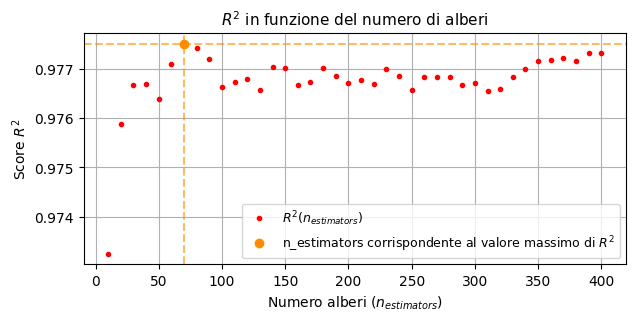

In [17]:
from sklearn.ensemble import RandomForestRegressor                             # Importazione libreria per il Random Forest Regressor

n_estimators_range=np.arange(10,401,10)                                        #  Range del numero di alberi decisionali

regressor_test3=np.zeros(len(n_estimators_range))                              #  Creazione array vuoto per i coeff. R^2

for i in range(len(n_estimators_range)):
  model3 = RandomForestRegressor(n_estimators=n_estimators_range[i],           #  n_estimators : numero di alberi della foresta
                                criterion='friedman_mse',                      #  criterion : criterio di divisione
                                max_depth=None,                                #  max_depth : profondità max degli alberi
                                oob_score=True,                                #  oob_score : calcolo della out-of-bag score
                                random_state=42,                               #  seed per generazione di n. casuali
                                warm_start=True,                               #  utilizza le soluzioni dei precedenti addestramenti e aggiunge più alberi alla foresta esistente
                                min_samples_split=2)

  model3.fit(X_train, y_train)                                                 # Si adatta il modello ai dati di training

  y_pred3_train = model3.predict(X_train)                                      # Si valuta il modello sui dati di train effettuando una predizione
  y_pred3_test = model3.predict(X_test)                                        # Si valuta il modello sui dati di test effettuando una predizione

  mse3_train = mean_squared_error(y_train, y_pred3_train)                      # Calcolo del MSE sui dati di train
  mae3_train = mean_absolute_error(y_train, y_pred3_train)                     # Calcolo del MAE sui dati di train

  mse3_test = mean_squared_error(y_test, y_pred3_test)                         # Calcolo del MSE sul test set
  mae3_test = mean_absolute_error(y_test, y_pred3_test)                        # Calcolo del MAE sul test set

  regressor_train3=model3.score(X_train,y_train)                               # Calcolo del R^2 Score per i dati di train
  regressor_test3[i]=model3.score(X_test,y_test)                               # Calcolo del R^2 Score per i dati di test

n_estimators_best = n_estimators_range[np.argmax(regressor_test3)]             # Si ricerca il numero di alberi per cui si hanno le migliori prestazioni
regressor_test3_best = np.max(regressor_test3)
print("Miglior risultato per n_estimators =", n_estimators_best, "\t R^2 corrispondente =", np.max(regressor_test3))
print("\n")

# Si plotta l'andamento di R^2 in funzione del numero di alberi
plt.figure(figsize=(7, 3))
plt.title('$R^2$ in funzione del numero di alberi',fontsize=11)
plt.plot(n_estimators_range,regressor_test3, '.r', label='$R^2(n_{estimators})$')
plt.plot(n_estimators_best, np.max(regressor_test3), 'o',color = 'darkorange', label='n_estimators corrispondente al valore massimo di $R^2$')
plt.xlabel("Numero alberi ($n_{estimators}$)")
plt.ylabel("Score $R^2$")
plt.axhline(regressor_test3_best, linestyle='--',color = 'darkorange', alpha=0.6)       # R^2 massimo
plt.axvline(n_estimators_best, linestyle='--',color = 'darkorange', alpha=0.6)
plt.grid()
plt.legend(loc='best', fontsize=9)
plt.show()

Nella seguente cella si inizializza il modello di random forest regressor il valore del numero di alberi ottimizzato

In [18]:
# Si chiama il modello per il valore di n_estimators tale che il coefficiente di determinazione è massimo

# Inizializzazione del modello
model3_best = RandomForestRegressor(n_estimators=n_estimators_best,            #  n_estimators : numero di alberi della foresta
                                criterion='friedman_mse',                      #  criterion : criterio di divisione
                                max_depth=None,                                #  max_depth : profondità max degli alberi
                                oob_score=True,                                #  oob_score : calcolo della out-of-bag score
                                random_state=42,                                #  seed per generazione di n. casuali
                                warm_start=True,                               #  utilizza le soluzioni dei precedenti addestramenti e aggiunge più alberi alla foresta esistente
                                min_samples_split=2)

model3_best.fit(X_train, y_train)                                  # Si adatta il modello ai dati di training

y_pred3_train = model3_best.predict(X_train)                       # Si valuta il modello sui dati di train effettuando una predizione
y_pred3_test = model3_best.predict(X_test)                         # Si valuta il modello sui dati di test effettuando una predizione

mse3_train = mean_squared_error(y_train, y_pred3_train)            # Calcolo del MSE sui dati di train
mae3_train = mean_absolute_error(y_train, y_pred3_train)           # Calcolo del MAE sui dati di train

mse3_test = mean_squared_error(y_test, y_pred3_test)               # Calcolo del MSE sul test set
mae3_test = mean_absolute_error(y_test, y_pred3_test)              # Calcolo del MAE sul test set

regressor_train3=model3_best.score(X_train,y_train)                # Calcolo del R^2 Score per i dati di train
regressor_test3=model3_best.score(X_test,y_test)                   # Calcolo del R^2 Score per i dati di test

print("Analisi per n_estimators =", n_estimators_best,'\n')
printResults(regressor_train3,regressor_test3_best,mse3_train,mse3_test,mae3_train,mae3_test,y_test,y_pred3_test)

Analisi per n_estimators = 70 

Coeff. di determinazione R^2 score:
 Train 0.9939145364951614 
 Test: 0.9775032379644046 

MSE train: 0.018482189927046574 	 MSE test: 0.06880896052343698
MAE train: 0.09709258269456833 	 MAE test: 0.20519497620545255 

Media delle label del test set del dataset:  -0.3930755440850496
Media delle predizioni sul test:  -0.33803311014054477


### **K-Neighbors Regressor**


score max:  0.8942041189691445
k (max):  4


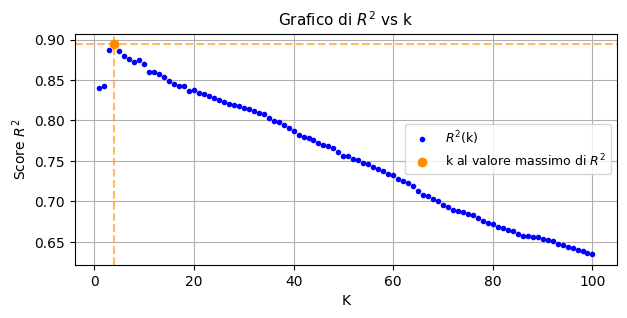

In [19]:
from sklearn import neighbors                              # Importazione della libreria neighbors,
                                                           # che fornisce strumenti per implementare metodi che si basano sui vicini

k_range_max = 100                                          # Scelta del limite superiore di k
k = np.arange(1, k_range_max+1, 1)                         # Creazione array dei k

score_k_array = np.empty(k.size)                           # Creazione array vuoto degli R^2

for i in range(k.size):                                    # Si apre un ciclo su tutti i valori di k contenuti nell'array
  model4 = neighbors.KNeighborsRegressor(k[i])             # Si inizializza il modello per l'i-esimo valore di k nell'array
  model4.fit(X_train,y_train)                              # Si adatta il modello ai dati di training per quel k
  score_k_array[i] = model4.score(X_test,y_test)           # Viene calcolato l'i-esimo coefficiente R^2

# Si ricercano i parametri per cui si ha una migliore accuratezza
score_k_best = np.max(score_k_array)                       # Massimo coefficiente R^2
k_best = k[np.argmax(score_k_array)]                       # e il ssuo k corrispondente

# Grafico di R^2 in funzione di k
plt.figure(figsize=(7, 3))
plt.title('Grafico di $R^2$ vs k',fontsize=11)
plt.xlabel('K')
plt.ylabel('Score $R^2$')
plt.axhline(score_k_best, linestyle='--',color = 'darkorange', alpha=0.6)       # R^2 massimo
plt.axvline(k_best, linestyle='--',color = 'darkorange', alpha=0.6)             # k per il quale R^2 è massimo
plt.plot (k, score_k_array,'.b', label='$R^2$(k)')
plt.plot(k_best, score_k_best, 'o',color='darkorange', label='k al valore massimo di $R^2$')
plt.legend(loc='best',fontsize=9)
plt.grid()

print('score max: ', np.max(score_k_array))
print('k (max): ', k[np.argmax(score_k_array)])

Si inizializza il modello di K-neighbors regressor per il valore di k ottimizzato

In [20]:
# Si richiama il modello per il valore di k tale che il coefficiente di determinazione è massimo

model4_best = neighbors.KNeighborsRegressor(k_best)               # Inizializzazione del modello per il valore di k tale che R^2 è massimo

model4_best.fit(X_train,y_train)                                  # Fit con i dati di train

y_pred4_train = model4_best.predict(X_train)                      # Si valuta il modello sui dati di train effettuando una predizione
y_pred4_test = model4_best.predict(X_test)                        # Si valuta il modello sui dati di test effettuando una predizione

mse4_train = mean_squared_error(y_train, y_pred4_train)           # Calcolo del MSE sui dati di train
mae4_train = mean_absolute_error(y_train, y_pred4_train)          # Calcolo del MAE sui dati di train

mse4_test = mean_squared_error(y_test, y_pred4_test)              # Calcolo del MSE sul test set
mae4_test = mean_absolute_error(y_test, y_pred4_test)             # Calcolo del MAE sul test set

regressor_train4=model4_best.score(X_train,y_train)               # Calcolo del R^2 Score per i dati di train
regressor_test4=model4_best.score(X_test,y_test)                  # Calcolo del R^2 Score per i dati di test

print('Analisi per k =',k_best,'\n')
printResults(regressor_train4,regressor_test4,mse4_train,mse4_test,mae4_train,mae4_test,y_test,y_pred4_test)

Analisi per k = 4 

Coeff. di determinazione R^2 score:
 Train 0.9359205577793557 
 Test: 0.8942041189691445 

MSE train: 0.19461597635076952 	 MSE test: 0.32358899426842436
MAE train: 0.34181540182975834 	 MAE test: 0.4380403744373122 

Media delle label del test set del dataset:  -0.3930755440850496
Media delle predizioni sul test:  -0.3264677699969159


# **Confronto tra i modelli**



In questa sezione si passa a confrontare i modelli attraverso i valori delle metriche e delle predizioni ottenute, andando a fare l'istogramma dei residui, gli scatter plot dei target attesi vs target predetti e un grafico a barre finale per mettere in confronto i coefficienti $R^2$ ottenuti dai vari modelli

In [21]:
# Array di stringhe con i nomi dei metodi
methods = ['LASSO', 'Linear Regression','Random Forest Regressor', 'K-Neighbors Regressor']

# Array delle predizioni per ciascun modello
pred = [y_pred1_test,y_pred2_test,y_pred3_test,y_pred4_test]

# Array dei coefficienti R^2 per ciascun metodo
score_R2 = [regressor_test1, regressor_test2, regressor_test3, regressor_test4]

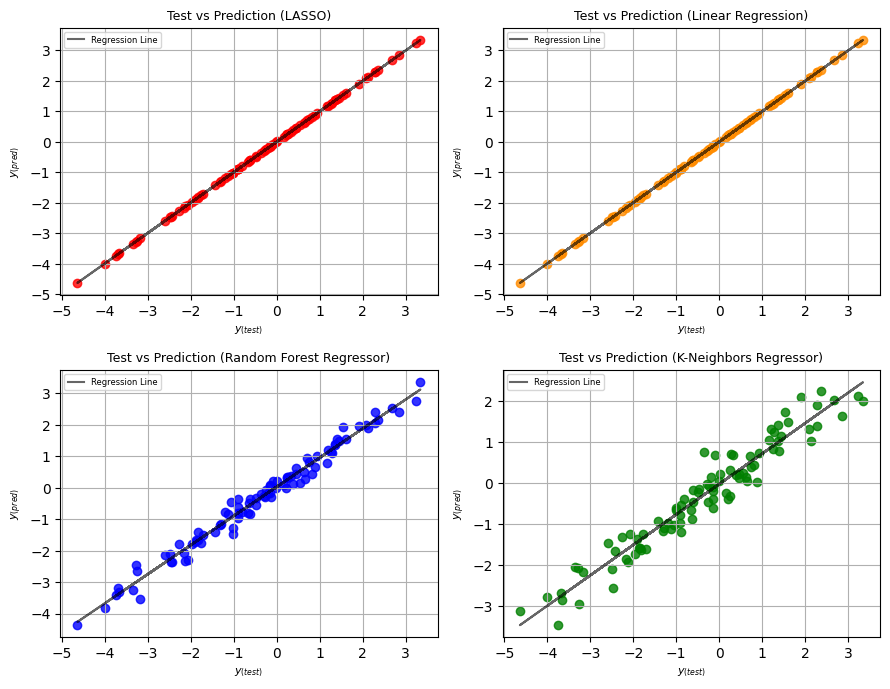

In [22]:
# Scatter plot di ogni metodo con retta di regressione tra test e predizione

plt.figure(figsize=(9, 10))
for i in range(4):
  plt.subplot(3,2,i+1)
  plt.title(f'Test vs Prediction ({methods[i]})', fontsize=9)
  plt.grid()
  plt.scatter(y_test, pred[i], alpha=0.8,color=colors[i])
  plt.xlabel("$y_{(test)}$", fontsize=8)
  plt.ylabel("$y_{(pred)}$", fontsize=8)
  RegressionLine_Plot(y_test, pred[i])
  plt.legend(fontsize=6,loc='best',frameon=True)
plt.tight_layout()

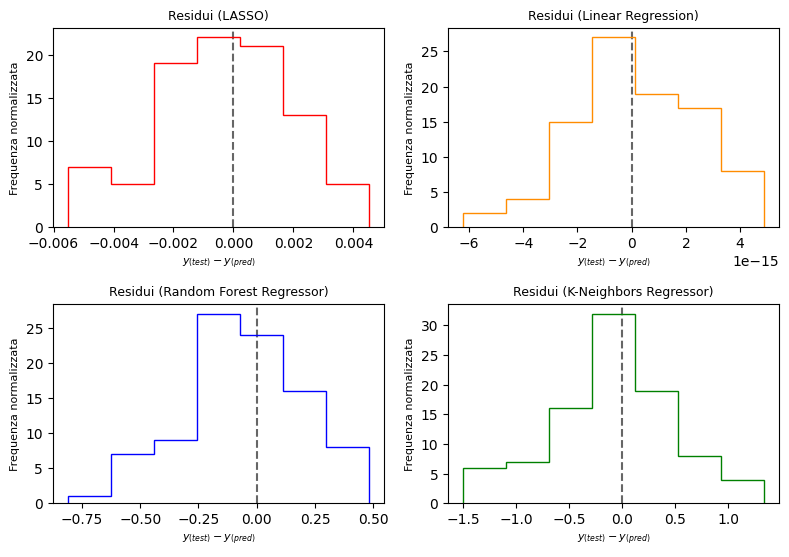

In [23]:
# Istogrammi dei residui (y_test - y_pred)

plt.figure(figsize=(8, 8))
for i in range(4):
  plt.subplot(3,2,i+1)
  plt.title(f'Residui ({methods[i]})', fontsize=9)
  # plt.grid()
  ZeroLine_Plot()
  plt.hist(y_test-pred[i], bins=7, histtype='step',color=colors[i], density=False)
  plt.xlabel("$y_{(test)}-y_{(pred)}$", fontsize=8)
  plt.ylabel("Frequenza normalizzata", fontsize=8)
plt.tight_layout()

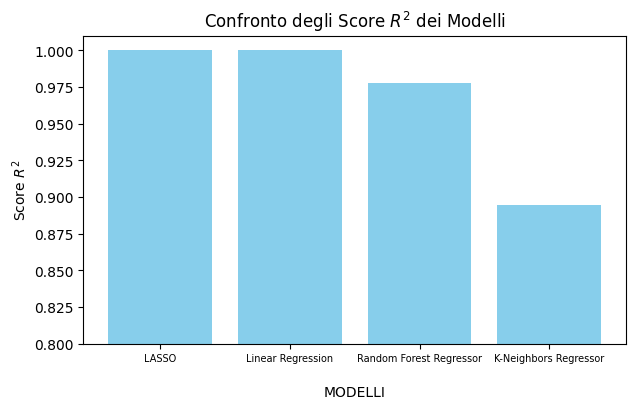

In [24]:
# Grafico a barre di confronto tra le score R^2 dei diversi modelli

plt.figure(figsize=(7, 4))
plt.title('Confronto degli Score $R^2$ dei Modelli')
plt.xlabel('\nMODELLI')
plt.ylabel('Score $R^2$')
plt.xticks(range(len(methods)), methods, fontsize=7)
plt.bar(methods, score_R2, color='skyblue')
plt.ylim(0.8, 1.01)
plt.show()